<a href="https://www.kaggle.com/amsamms/google-play-2-3-million-app-quick-analysis?scriptVersionId=85088479" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('../input/google-playstore-apps/Google-Playstore.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

# EDA of data

turning `Released` to datetime and then describe the data

In [3]:
data['Released']=pd.to_datetime(data['Released'])

In [4]:
data['Last Updated']=pd.to_datetime(data['Last Updated'])

In [5]:
data.describe(include='all')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
count,2312942,2312944,2312944,2.290061e+06,2.290061e+06,2312837,2.312837e+06,2.312944e+06,2312944,2.312944e+06,...,1552109,2312913,2241891,2312944,2312944,1891991,2312944,2312944,2312944,2312944
unique,2177944,2312944,48,NaN,NaN,22,NaN,NaN,2,NaN,...,810440,950456,4158,3918,6,977743,2,2,2,67374
top,Tic Tac Toe,com.ishakwe.gakondo,Education,NaN,NaN,100+,NaN,NaN,True,NaN,...,http://www.subsplash.com/,support@classplus.co,2020-06-16 00:00:00,2021-06-10 00:00:00,Everyone,http://www.subsplash.com/legal/privacy,False,False,False,2021-06-16 07:35:57
freq,382,1,241090,NaN,NaN,443368,NaN,NaN,2267876,NaN,...,7519,10345,2051,11186,2022089,7481,1162170,2117635,2312091,56
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2010-01-28 00:00:00,2009-02-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2021-06-16 00:00:00,2021-06-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.203152e+00,2.864839e+03,NaN,1.834452e+05,3.202017e+05,NaN,1.034992e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.106223e+00,2.121626e+05,NaN,1.513144e+07,2.355495e+07,NaN,2.633127e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,5.000000e+01,8.400000e+01,NaN,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking NAN values

In [6]:
data.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

# What is the highest rated category 

In [7]:
data_group=data.groupby('Category').mean().sort_values('Rating', ascending=False)
data_group

,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Ad Supported,In App Purchases,Editors Choice
Category,,,,,,,,,
Role Playing,3.384498,14559.170446,4.761227e+05,8.616850e+05,0.931234,0.311842,0.662846,0.467012,0.007873
Casino,3.279682,9692.946375,2.461808e+05,4.379218e+05,0.985028,0.071208,0.744681,0.497636,0.000000
Simulation,3.210887,10155.266854,5.023213e+05,8.571885e+05,0.971824,0.109980,0.855511,0.312044,0.002448
Weather,3.120295,5252.545021,3.828183e+05,6.383209e+05,0.967292,0.146557,0.621722,0.241927,0.000690
Card,3.085160,6321.819662,2.433132e+05,4.084729e+05,0.964910,0.130244,0.726861,0.332559,0.001956
Racing,2.960385,17797.062389,8.896903e+05,1.649656e+06,0.986296,0.034492,0.886219,0.292029,0.001544
Video Players & Editors,2.903842,19028.560144,1.326518e+06,2.243268e+06,0.975526,0.122585,0.671352,0.082768,0.000642
Word,2.902076,6467.382639,2.352085e+05,4.013861e+05,0.978447,0.099734,0.865933,0.365006,0.001390
Strategy,2.878900,28328.303023,4.879284e+05,9.021062e+05,0.933380,0.225375,0.629486,0.391977,0.004926


Role playing is the category with the highest rating

<AxesSubplot:xlabel='Rating', ylabel='Category'>

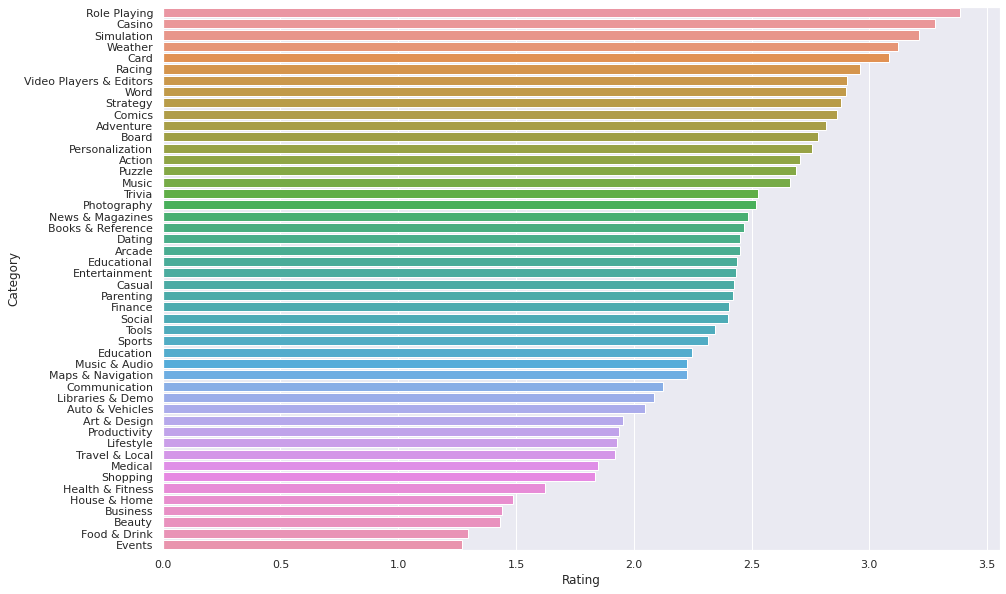

In [8]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.barplot(x='Rating',y=data_group.index, data=data_group)


# What year has the most number of apps released

In [9]:
data['year']=data['Released'].dt.year

<AxesSubplot:>

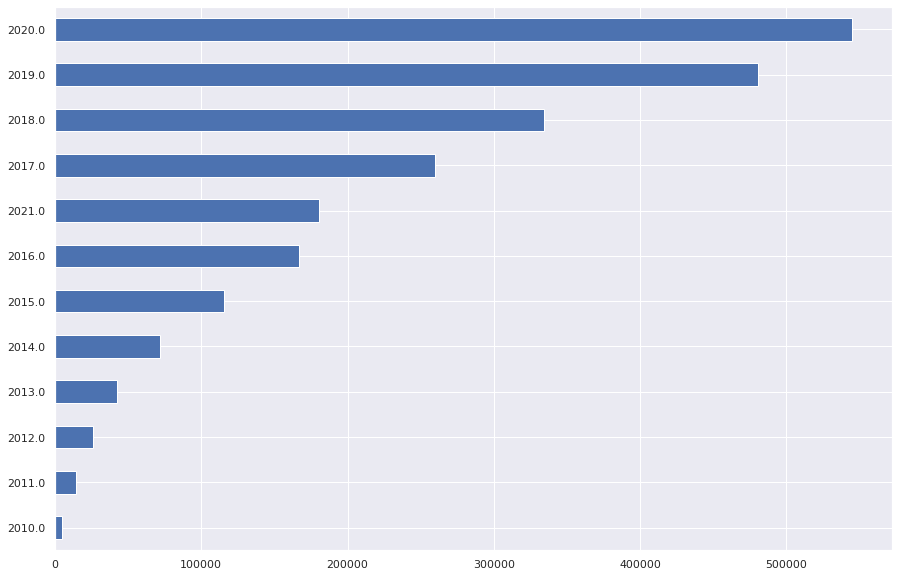

In [10]:
data['year'].value_counts(ascending=True).plot(kind='barh')

Execluding 2021, we can find total app numbers increases on yearly basis, as data shows, the number of apps in the last couples of years is approximately equal to all the apps combined in all previous years !

In [11]:
k=data['year'].value_counts(ascending=True).to_frame()
k.iloc[-2:].sum()/(k.iloc[:-2].sum()-180508)*100

year    99.006696
dtype: float64

# What is the most expensive app ?

In [12]:
data[data['Price']==data['Price'].max()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,year
544468,MESH Connect,com.tecit.android.bluepiano.meshconnectfull,Productivity,0.0,0.0,10+,10.0,25,False,400.0,...,support@go-evo.com,2017-09-07,2017-09-07,Everyone,http://www.go-evo.com/privacy,False,False,False,2021-06-16 05:15:22,2017.0


The most expensive app is `MESH Connect` which price is 400 USD but all installs are only 10 which is not logic, so we will find the most expensive app with criteria that at least number of installment should be after first quartile and rating count of more than 500.

converting `Installs` column to float

In [13]:
data['Installs']=data['Installs'].str.replace('+','')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [14]:
data['Installs']=data['Installs'].str.replace(',','')

In [15]:
data['Installs'].fillna(0,inplace=True)

In [16]:
data['Installs']=data['Installs'].astype('float')

In [17]:
data_installs=data[data['Installs']>data['Installs'].quantile(0.25)]
data_installs.nlargest(10,'Price')

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,year
1399820,Most expensive word game,com.wMostexpensivewordgame_10919836,Board,3.4,122.0,5000.0,5000.0,5523,False,399.99,...,f251s5@yahoo.com,2020-05-11,2020-10-13,Everyone,http://Vadaaa.com,True,False,False,2021-06-15 23:46:04,2020.0
1444845,Plasma duct - Premium Game,synthesis.game.plasmaduct,Puzzle,3.5,88.0,1000.0,1000.0,3369,False,399.99,...,x@x-id.ru,2019-03-04,2019-03-04,Everyone,http://x-id.ru/pp.txt,False,True,False,2021-06-16 00:31:41,2019.0
1638663,Точки интереса,my.pointsofinterest,Maps & Navigation,4.1,261.0,1000.0,1000.0,1000,False,399.99,...,tochkiinteresapro@gmail.com,2018-07-08,2020-09-08,Teen,http://tochkiinteresa.ru/app/privacy.html,False,False,False,2021-06-16 03:19:53,2018.0
1859780,AudD,io.audd.android,Music & Audio,3.2,66.0,1000.0,1000.0,4397,False,399.99,...,hello@audd.io,2018-02-17,2018-02-17,Everyone,https://audd.io/privacy/,False,False,False,2021-06-16 06:24:31,2018.0
2085590,Series Addict Pro - TV Guide,com.alamkanak.seriesaddict.pro,Entertainment,4.1,58.0,500.0,500.0,639,False,399.99,...,alam.kanak@gmail.com,2014-10-08,2021-06-03,Teen,https://alamkanak.github.io/Series-Addict-App-...,False,False,False,2021-06-16 09:40:51,2014.0
1821265,Auto File Transfer (deprecated),net.noople.autotransfer.full,Tools,4.3,44.0,500.0,500.0,695,False,394.99,...,info@noople.net,2018-01-11,2019-07-16,Everyone,NaN,False,False,False,2021-06-16 05:51:45,2018.0
776953,Happiness,com.maplescot.happiness,Lifestyle,3.5,8.0,100.0,100.0,201,False,389.99,...,info@maple.scot,2016-06-08,2018-09-05,Everyone,http://maple.scot/index.php/privacy-policy,False,False,False,2021-06-16 08:50:37,2016.0
1577807,JAVAD Mobile Tools,com.javad.javadtools,Tools,3.7,141.0,1000.0,1000.0,1114,False,389.99,...,jmt.support@javad.com,2014-05-30,2021-04-29,Everyone,http://javad.com/jgnss/javad/content/en/Privac...,False,False,False,2021-06-16 02:29:44,2014.0
1503647,[Legacy] Alarmy (Sleep If U Can),droom.sleepIfUCan.pro,Lifestyle,4.1,11534.0,10000.0,10000.0,45305,False,379.99,...,cs@delightroom.com,2012-12-02,2020-02-10,Everyone,http://alar.my/privacy_policy.html,False,False,False,2021-06-16 01:25:31,2012.0
677674,Mega Tips Bet Premium (LifeTime),com.hiba.megatipsbet.premium,Sports,4.4,28.0,100.0,100.0,131,False,338.99,...,megatipsbet@gmail.com,2019-06-18,2020-10-26,Everyone,http://bet.hibatest.com/mega-tips-bet-premium....,False,False,False,2021-06-16 07:17:09,2019.0


from above, and with prescriped criteria we can say that the most expensive app is `[Legacy] Alarmy (Sleep If U Can)` with around 380 USD

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 25 columns):
 #   Column             Dtype         
---  ------             -----         
 0   App Name           object        
 1   App Id             object        
 2   Category           object        
 3   Rating             float64       
 4   Rating Count       float64       
 5   Installs           float64       
 6   Minimum Installs   float64       
 7   Maximum Installs   int64         
 8   Free               bool          
 9   Price              float64       
 10  Currency           object        
 11  Size               object        
 12  Minimum Android    object        
 13  Developer Id       object        
 14  Developer Website  object        
 15  Developer Email    object        
 16  Released           datetime64[ns]
 17  Last Updated       datetime64[ns]
 18  Content Rating     object        
 19  Privacy Policy     object        
 20  Ad Supported       bool 

In [19]:
pd.set_option("display.max_columns", None)


# What is the maximum size of app and does the size average change over the years

remove nan and from `Size` and creating new column `size_in_KB` that contains all sizes converted to K and converted to float datatype

In [20]:
data['Size'].fillna('00M',inplace=True)

In [21]:
data['size_u']=np.nan
for i in data.index:
    if 'M' in data['Size'][i]:
        data['size_u'][i]=data['Size'][i].replace('M','').replace(',','')
        data['size_u'][i]= float(data['size_u'][i])
        data['size_u'][i]=data['size_u'][i]*1000   
    elif 'k' in data['Size'][i]:
        data['size_u'][i]=data['Size'][i].replace('k','').replace(',','')
        data['size_u'][i]= float(data['size_u'][i])
    elif 'G' in data['Size'][i]:
        data['size_u'][i]=data['Size'][i].replace('G','').replace(',','')
        data['size_u'][i]= float(data['size_u'][i])
        data['size_u'][i]=data['size_u'][i]*1000000 
    else:
        data['size_u'][i]=np.nan
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: Se

In [22]:
data.rename(columns={"size_u": "size_in_KB"},inplace=True)

In [23]:
data['size_in_KB'].fillna(0,inplace=True)


In [24]:
data_size=data.groupby('year').mean()
data_size

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Ad Supported,In App Purchases,Editors Choice,size_in_KB
year,,,,,,,,,,,
2010.0,3.760310,115179.685844,8.001240e+06,8.001240e+06,1.419486e+07,0.830424,0.788604,0.445378,0.167636,0.005387,11902.084637
2011.0,3.644892,25566.755170,1.925151e+06,1.925151e+06,3.310347e+06,0.850508,0.709984,0.431834,0.142111,0.002507,12772.989173
2012.0,3.545123,28004.117857,1.747517e+06,1.747517e+06,2.969179e+06,0.883948,0.583303,0.434536,0.141764,0.001864,13946.378052
2013.0,3.428985,17731.185926,9.729238e+05,9.729238e+05,1.836796e+06,0.913904,0.366796,0.454421,0.160985,0.001271,14899.707746
2014.0,3.339264,10783.656784,5.422751e+05,5.422751e+05,8.820315e+05,0.938439,0.285436,0.472937,0.127425,0.000905,14416.601874
2015.0,3.082216,5636.559101,3.947319e+05,3.947353e+05,6.699113e+05,0.964819,0.156595,0.492454,0.116978,0.000667,14929.860132
2016.0,2.769068,3728.406730,2.117486e+05,2.117486e+05,3.862846e+05,0.972426,0.135460,0.471486,0.103404,0.000652,16414.549981
2017.0,2.476667,2443.196332,1.592031e+05,1.592031e+05,2.779235e+05,0.980765,0.099624,0.492647,0.088638,0.000555,16933.957061
2018.0,2.231984,1470.199516,1.008017e+05,1.008026e+05,1.821923e+05,0.983797,0.091156,0.498694,0.079667,0.000305,17096.679995


<AxesSubplot:xlabel='year', ylabel='size_in_KB'>

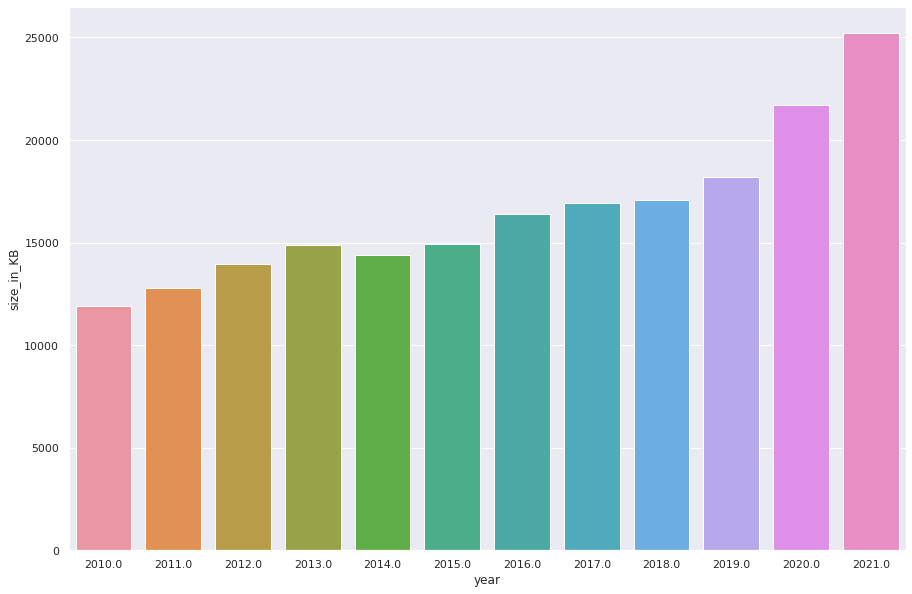

In [25]:
sns.barplot(x=data_size.index,y='size_in_KB',data=data_size)

As expected, generally average apps size increases with Time

In [26]:
data[data.size_in_KB==data.size_in_KB.max()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,year,size_in_KB
93175,Titan Quest: Legendary Edition,com.hg.titanquestedition,Role Playing,4.1,1387.0,5000.0,5000.0,8329,False,19.99,USD,1.5G,5.0 and up,HandyGames,https://www.handy-games.com/,support@handy-games.com,2021-02-02,2021-05-17,Teen,http://play.handygames.info/privacy/,False,False,False,2021-06-15 21:51:47,2021.0,1500000.0
529736,Titan Quest,com.dotemu.titanquest,Action,4.1,24339.0,100000.0,100000.0,223859,False,7.99,USD,1.5G,5.0 and up,HandyGames,https://www.handy-games.com,support@handy-games.com,2016-07-06,2021-05-17,Teen,http://play.handygames.info/privacy/,False,True,False,2021-06-16 05:01:58,2016.0,1500000.0


Maximum size for the given data is `Titan Quest` by `HandyGames`

# what is the proportion between Free and paid games ?

In [27]:
data_free=data.groupby('Free').count()
data_free

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,year,size_in_KB
Free,,,,,,,,,,,,,,,,,,,,,,,,,
False,45068,45068,45068,44841,44841,45068,44961,45068,45068,44933,45068,44790,45068,34416,45065,44230,45068,45068,29383,45068,45068,45068,45068,44230,45068
True,2267874,2267876,2267876,2245220,2245220,2267876,2267876,2267876,2267876,2267876,2267876,2261624,2267843,1517693,2267848,2197661,2267876,2267876,1862608,2267876,2267876,2267876,2267876,2197661,2267876


In [28]:
data_free['Category'][1]/(data_free['Category'][1]+data_free['Category'][0])*100

98.05148762788896

Around 98 % of the apps are free 

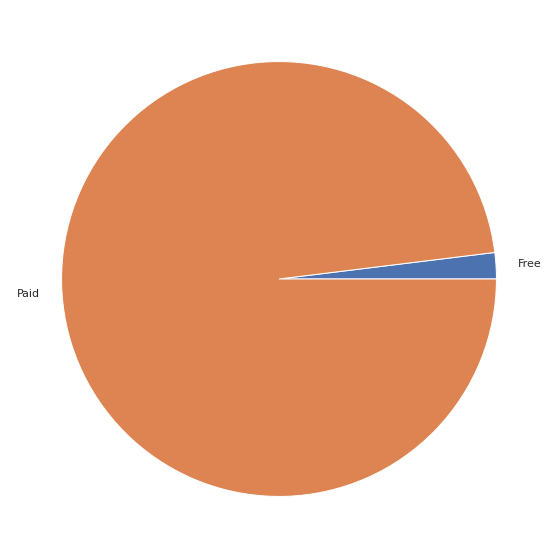

In [29]:
plt.pie(data_free['Category'], labels=['Free','Paid'])
plt.show()

In [30]:
data.groupby(['year','Free']).count()

App Name  App Id  Category  Rating  Rating Count  Installs  \
year   Free                                                                
2010.0 False       787     787       787     787           787       787   
       True       3854    3854      3854    3854          3854      3854   
2011.0 False      2147    2147      2147    2147          2147      2147   
       True      12214   12215     12215   12214         12214     12215   
2012.0 False      2988    2988      2988    2988          2988      2988   
       True      22759   22759     22759   22755         22755     22759   
2013.0 False      3657    3657      3657    3657          3657      3657   
       True      38819   38819     38819   38817         38817     38819   
2014.0 False      4421    4421      4421    4420          4420      4421   
       True      67394   67394     67394   67392         67392     67394   
2015.0 False      4061    4061      4061    4060          4060      4061   
       True     111371  111371    111371  111370        111370    111371   
2016.0 False      4608    4608      4608    4608          4608      4608   
       True     162504  162504    162504  162498        162498    162504   
2017.0 False      4995    4995      4995    4995          4995      4995   
       True     254690  254690    254690  254678        254678    254690   
2018.0 False      5421    5421      5421    5416          5416      5421   
       True     329145  329145    329145  329128        329128    329145   
2019.0 False      5385    5385      5385    5380          5380      5385   
       True     475280  475280    475280  475241        475241    475280   
2020.0 False      5254    5254      5254    5252          5252      5254   
       True     539628  539628    539628  539560        539560    539628   
2021.0 False       506     506       506     505           505       506   
       True     180001  180002    180002  179961        179961    180002   

              Minimum Installs  Maximum Installs   Price  Currency    Size  \
year   Free                                                                  
2010.0 False               787               787     787       787     787   
       True               3854              3854    3854      3854    3854   
2011.0 False              2147              2147    2147      2146    2147   
       True              12215             12215   12215     12215   12215   
2012.0 False              2988              2988    2988      2988    2988   
       True              22759             22759   22759     22759   22759   
2013.0 False              3657              3657    3657      3657    3657   
       True              38819             38819   38819     38819   38819   
2014.0 False              4421              4421    4421      4419    4421   
       True              67394             67394   67394     67394   67394   
2015.0 False              4060              4061    4061      4060    4061   
       True             111371            111371  111371    111371  111371   
2016.0 False              4608              4608    4608      4606    4608   
       True             162504            162504  162504    162504  162504   
2017.0 False              4995              4995    4995      4994    4995   
       True             254690            254690  254690    254690  254690   
2018.0 False              5418              5421    5421      5413    5421   
       True             329145            329145  329145    329145  329145   
2019.0 False              5382              5385    5385      5379    5385   
       True             475280            475280  475280    475280  475280   
2020.0 False              5254              5254    5254      5244    5254   
       True             539628            539628  539628    539628  539628   
2021.0 False               506               506     506       504     506   
       True             180002            180002  180002    180002  180002   

        